# Get the insolation data file name list

In [1]:
import os
from collections import defaultdict

directory_path = r'D:\VScode\Last_deglaciation\inso_of_lats'

file_list = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f)) and f.endswith('.txt')]

# Initialize a default dictionary to store lists of files for each latitude
files_by_latitude = defaultdict(list)

# Loop over each file in the list
for file_name in file_list:
    # Split the file name by '_' and extract the latitude part (assuming the format is consistent)
    parts = file_name.split('_')
    latitude = parts[2]
    
    # Add the file to the corresponding list in the dictionary
    files_by_latitude[latitude].append(file_name)

# Convert defaultdict to regular dictionary for easier use
files_by_latitude = dict(files_by_latitude)

# Now, files_by_latitude is a dictionary where the keys are latitudes and the values are lists of file names
for latitude, files in files_by_latitude.items():
    print(f'Latitude: {latitude}, Files: {files}')


Latitude: 45S, Files: ['monthly_inso_45S_month_01_1to0Mr_inter100.txt', 'monthly_inso_45S_month_02_1to0Mr_inter100.txt', 'monthly_inso_45S_month_03_1to0Mr_inter100.txt', 'monthly_inso_45S_month_04_1to0Mr_inter100.txt', 'monthly_inso_45S_month_05_1to0Mr_inter100.txt', 'monthly_inso_45S_month_06_1to0Mr_inter100.txt', 'monthly_inso_45S_month_07_1to0Mr_inter100.txt', 'monthly_inso_45S_month_08_1to0Mr_inter100.txt', 'monthly_inso_45S_month_09_1to0Mr_inter100.txt', 'monthly_inso_45S_month_10_1to0Mr_inter100.txt', 'monthly_inso_45S_month_11_1to0Mr_inter100.txt', 'monthly_inso_45S_month_12_1to0Mr_inter100.txt']
Latitude: 50S, Files: ['monthly_inso_50S_month_01_1to0Mr_inter100.txt', 'monthly_inso_50S_month_02_1to0Mr_inter100.txt', 'monthly_inso_50S_month_03_1to0Mr_inter100.txt', 'monthly_inso_50S_month_04_1to0Mr_inter100.txt', 'monthly_inso_50S_month_05_1to0Mr_inter100.txt', 'monthly_inso_50S_month_06_1to0Mr_inter100.txt', 'monthly_inso_50S_month_07_1to0Mr_inter100.txt', 'monthly_inso_50S_month

In [29]:
files_by_latitude

{'45S': ['monthly_inso_45S_month_01_1to0Mr_inter100.txt',
  'monthly_inso_45S_month_02_1to0Mr_inter100.txt',
  'monthly_inso_45S_month_03_1to0Mr_inter100.txt',
  'monthly_inso_45S_month_04_1to0Mr_inter100.txt',
  'monthly_inso_45S_month_05_1to0Mr_inter100.txt',
  'monthly_inso_45S_month_06_1to0Mr_inter100.txt',
  'monthly_inso_45S_month_07_1to0Mr_inter100.txt',
  'monthly_inso_45S_month_08_1to0Mr_inter100.txt',
  'monthly_inso_45S_month_09_1to0Mr_inter100.txt',
  'monthly_inso_45S_month_10_1to0Mr_inter100.txt',
  'monthly_inso_45S_month_11_1to0Mr_inter100.txt',
  'monthly_inso_45S_month_12_1to0Mr_inter100.txt'],
 '50S': ['monthly_inso_50S_month_01_1to0Mr_inter100.txt',
  'monthly_inso_50S_month_02_1to0Mr_inter100.txt',
  'monthly_inso_50S_month_03_1to0Mr_inter100.txt',
  'monthly_inso_50S_month_04_1to0Mr_inter100.txt',
  'monthly_inso_50S_month_05_1to0Mr_inter100.txt',
  'monthly_inso_50S_month_06_1to0Mr_inter100.txt',
  'monthly_inso_50S_month_07_1to0Mr_inter100.txt',
  'monthly_inso_

# Put insolation data of the same latitude to a dataframe

In [2]:
import pandas as pd

monthly_inso_df = {}
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for latitude, files in files_by_latitude.items():
    # print(f'Latitude: {latitude}')
    # print(f'Files: {files}')
    # Initialize a DataFrame for this latitude
    df = pd.DataFrame()
    
    # Loop through the files and add each month's data to the DataFrame
    for monthly_file in files:
        parts = monthly_file.split('_')
        month_index=int(parts[4])-1
        # print(month_index)
        month = month_names[month_index]

        # Load the data from the text file
        monthly_data = pd.read_csv(os.path.join(directory_path, monthly_file), header=None,sep='\s+')
        # print(monthly_data)
        # break
        # Add the data to the DataFrame, using the month as the column name
        df[month] = monthly_data[1]
    
    # Store the DataFrame in the dictionary
    monthly_inso_df[f'{latitude.lower()}'] = df


In [36]:
monthly_inso_df['45s' ]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,457.750537,413.076166,342.792710,257.756610,177.825654,130.738710,137.685225,199.517592,292.361626,381.656154,443.757540,469.454825
1,457.620552,412.505194,342.122984,257.314603,177.673919,130.651020,137.495901,199.421227,292.697563,382.424076,444.577816,469.897287
2,457.517620,411.953771,341.460813,256.870253,177.517082,130.558045,137.293012,199.297759,293.005857,383.181852,445.409682,470.364901
3,457.442036,411.422564,340.806993,256.424130,177.355311,130.459885,137.076848,199.147170,293.285736,383.928402,446.252374,470.857452
4,457.393993,410.912165,340.162295,255.976813,177.188798,130.356662,136.847762,198.969563,293.536535,384.662666,447.105066,471.374627
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,511.397929,456.842255,362.390929,257.629171,170.995835,122.251367,119.334517,162.200690,243.729653,346.221510,443.343243,506.026564
9997,511.338573,457.093421,362.728420,257.863610,171.112028,122.346852,119.471204,162.320655,243.680300,345.902671,442.852273,505.634845
9998,511.261649,457.329788,363.059538,258.098103,171.230405,122.445079,119.612765,162.449929,243.644410,345.596270,442.364715,505.233408
9999,511.167527,457.551373,363.384101,258.332483,171.350880,122.545986,119.759072,162.588270,243.621711,345.302237,441.880875,504.822784


# Calculate the seasonal insolation for each latitude

In [3]:
import numpy as np

# Define the seasons
seasons = {
    'DJF': ['Dec', 'Jan', 'Feb'],
    'MAM': ['Mar', 'Apr', 'May'],
    'JJA': ['Jun', 'Jul', 'Aug'],
    'SON': ['Sep', 'Oct', 'Nov']
}

# Initialize a dictionary to store the seasonal insolation DataFrames
seasonal_inso_df = {}

# Loop through each latitude's monthly insolation DataFrame
for latitude, df in monthly_inso_df.items():
    # Initialize a DataFrame to store the seasonal averages for this latitude
    seasonal_df = pd.DataFrame(index=df.index)
    
    # Calculate the seasonal averages
    for season, months in seasons.items():
        # # Special handling for DJF since it spans two years
        # if season == 'DJF':
        #     # December from the previous year
        #     dec_previous_year = df['Dec'].shift(1)
        #     # January and February of the current year
        #     jan_feb = df[['Jan', 'Feb']]
        #     # Calculate the average
        #     seasonal_df[season] = np.mean(pd.concat([dec_previous_year, jan_feb], axis=1), axis=1)
        # else:
        # Calculate the average for the other seasons
        seasonal_df[season] = df[months].mean(axis=1)
    
    # Store the seasonal DataFrame in the dictionary
    seasonal_inso_df[f'{latitude.lower()}'] = seasonal_df

In [5]:
seasonal_inso_df['45s']

,DJF,MAM,JJA,SON
0,446.760509,259.458325,155.980509,372.591773
1,446.674344,259.037169,155.856049,373.233152
2,446.612097,258.616049,155.716272,373.865797
3,446.574017,258.195478,155.561301,374.488837
4,446.560262,257.775969,155.391329,375.101422
...,...,...,...,...
9996,491.422249,263.671978,134.595525,344.431469
9997,491.355613,263.901353,134.712904,344.145081
9998,491.274948,264.129349,134.835924,343.868465
9999,491.180561,264.355821,134.964443,343.601608


# Plot seasonal insolation

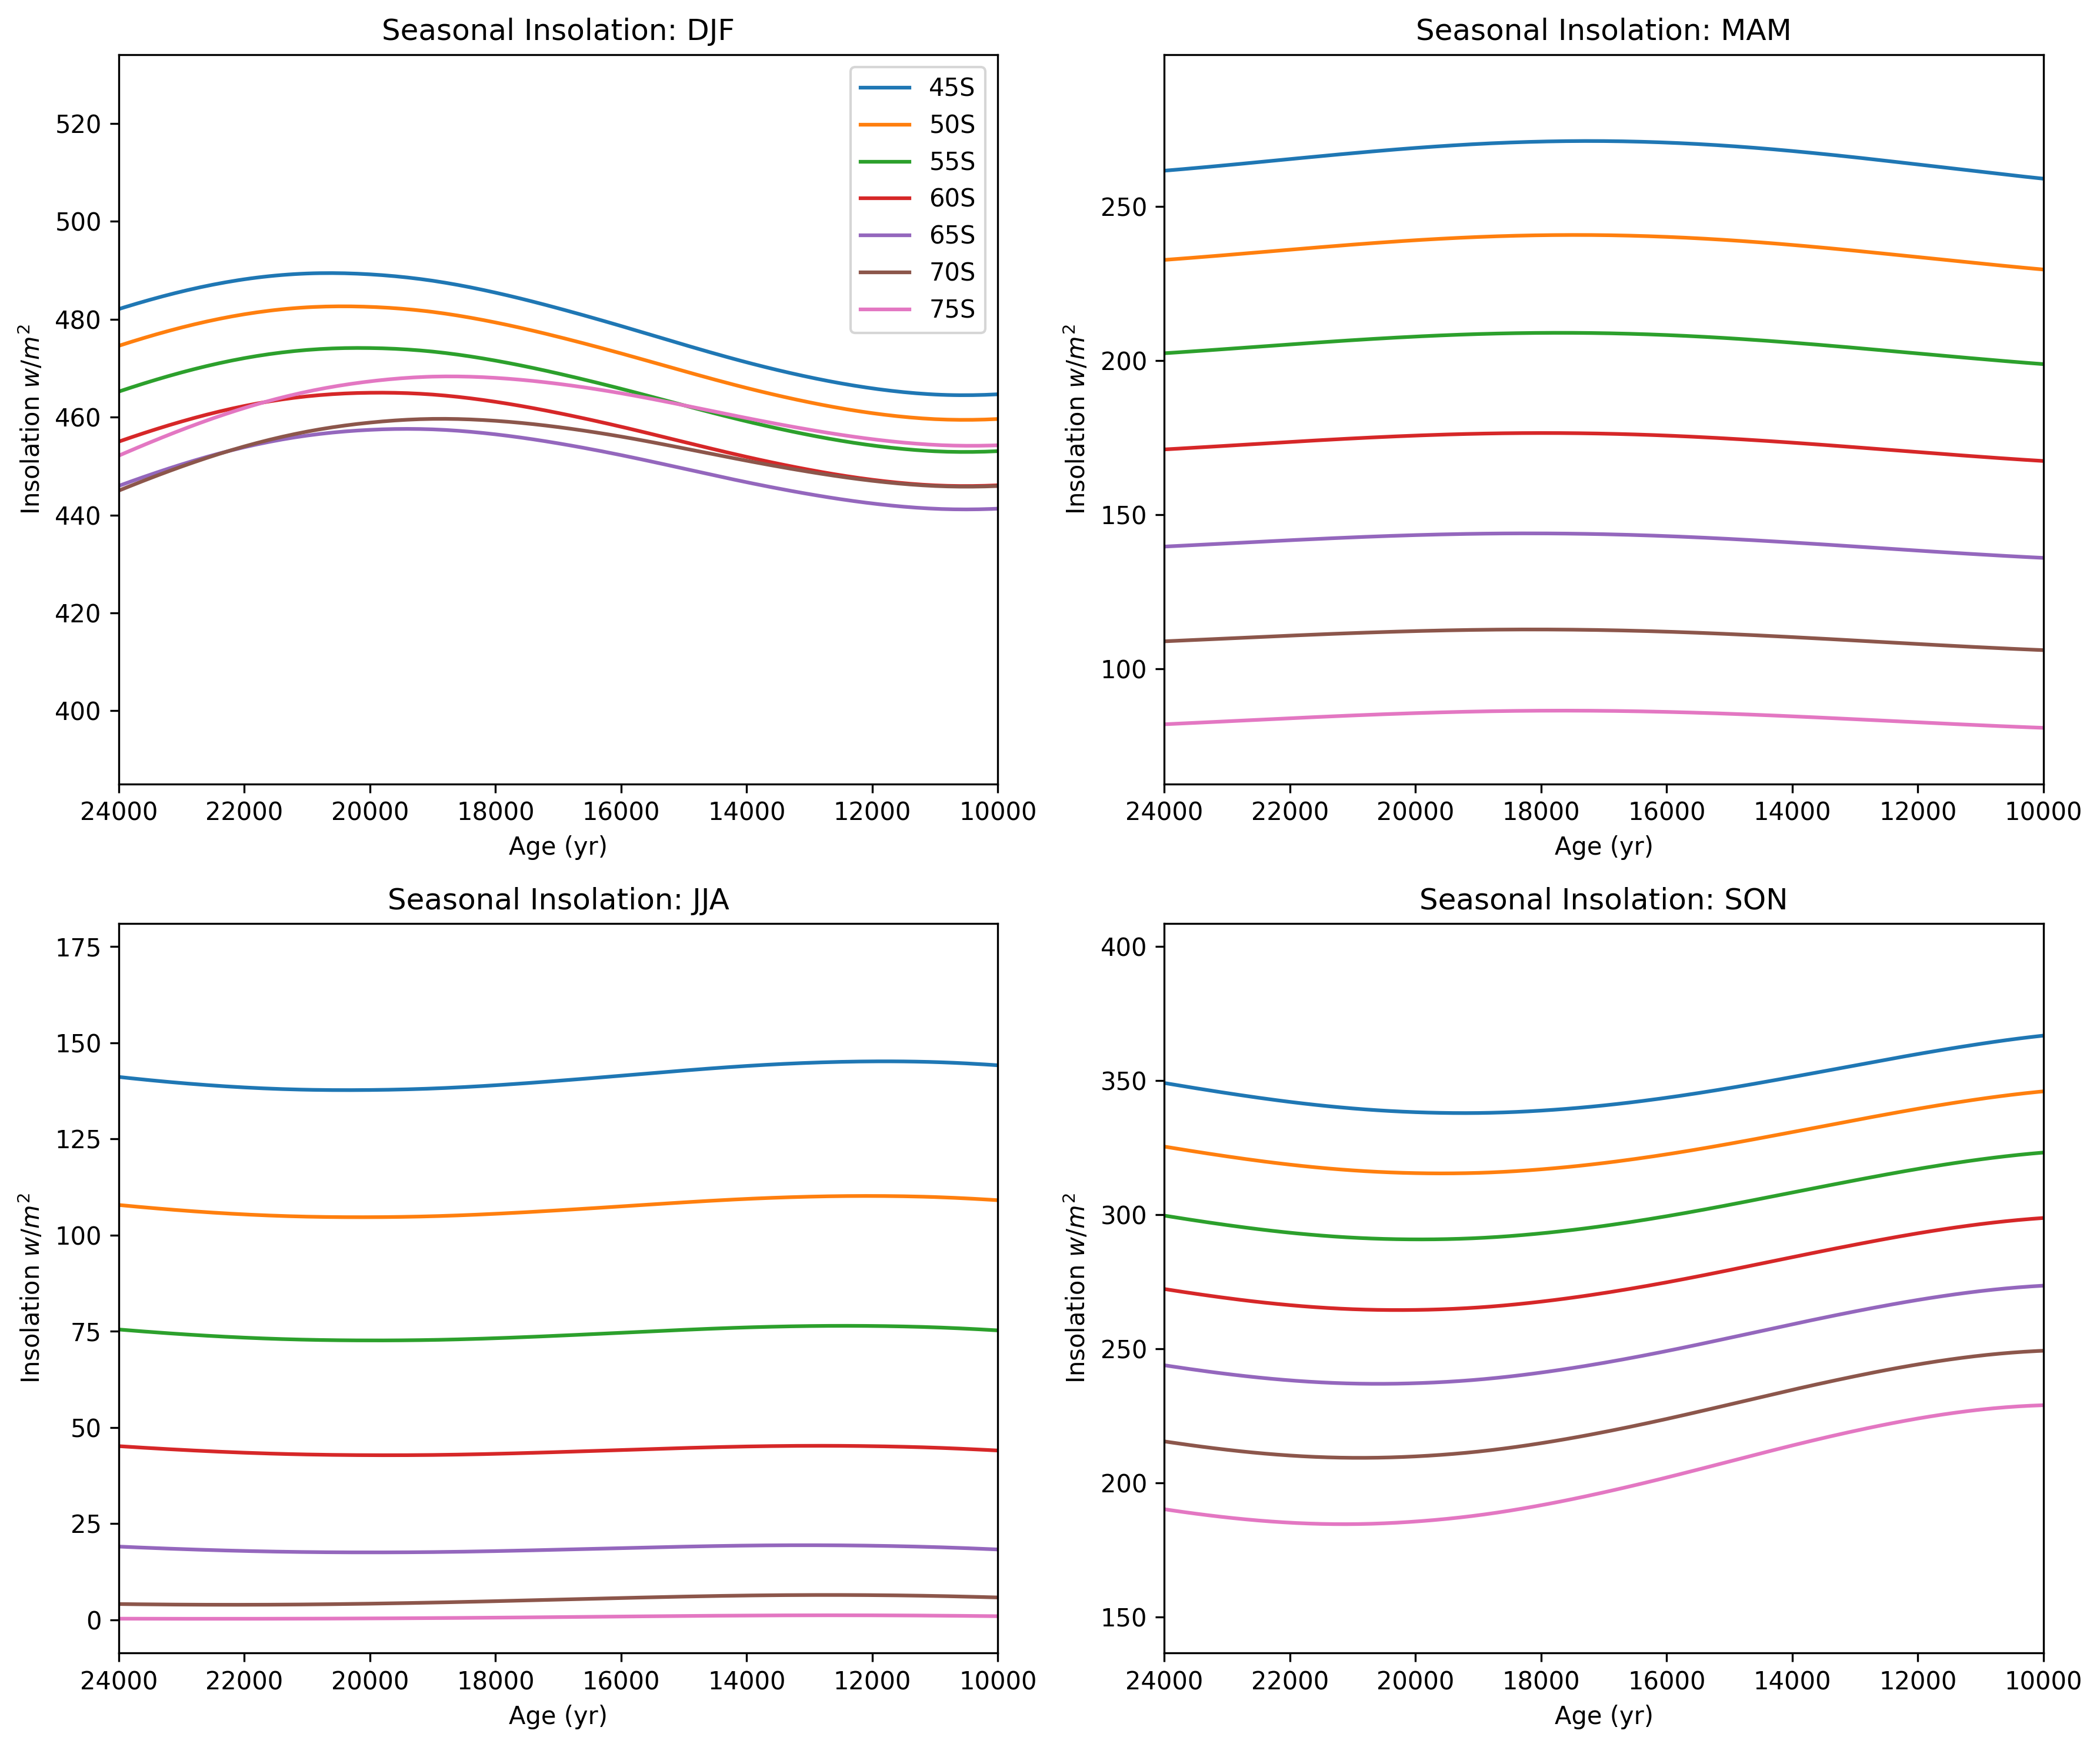

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Number of subplots (one for each season)
num_subplots = 4

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10), dpi=300)
axs = axs.flatten()  # Flatten the 2x2 array of axes for easy iteration

# create the time axis, which is from 0 to 1000000 years with interval of 100 years
time = np.arange(1000001, 0, -100)

# List of seasons
seasons = ['DJF', 'MAM', 'JJA', 'SON']

# Plot the data
i=0
for ax, season in zip(axs, seasons):
    for latitude, df in seasonal_inso_df.items():
        ax.plot(time, df[season], label=f'{latitude.upper()}')
        
    # Set the x limit
    ax.set_xlim(10000, 24000)
    # Reverse the x axis
    ax.invert_xaxis()
    ax.set_title(f'Seasonal Insolation: {season}')
    ax.set_ylabel('Insolation $w/m^2$')
    ax.set_xlabel('Age (yr)')
    if i==0:
        ax.legend()
    i=i+1

plt.tight_layout()
plt.show()


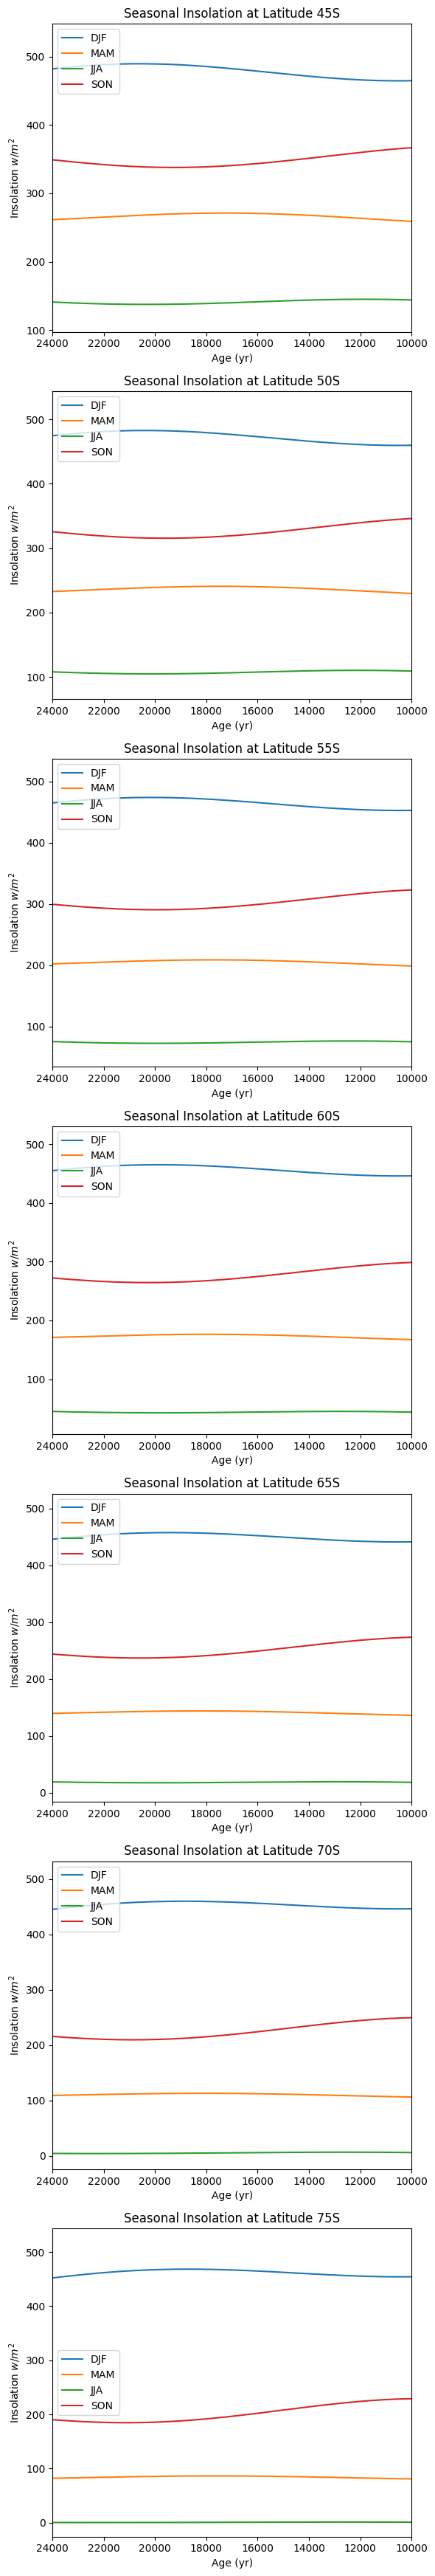

In [7]:
import matplotlib.pyplot as plt

# Number of subplots (one for each latitude)
num_subplots = len(seasonal_inso_df)

# Create subplots with n rows and 1 column
fig, axs = plt.subplots(num_subplots, 1, figsize=(6, 5 * num_subplots),dpi=100)

# Make sure axs is iterable
if num_subplots == 1:
    axs = [axs]

# create the time axis, which is from 0 to 1000000 years with interval of 100 years
time = np.arange(1000001,0,-100)

# Plot the data
for ax, (latitude, df) in zip(axs, seasonal_inso_df.items()):
    # Plot the seasonal insolation data
    for season in df.columns:
        ax.plot(time, df[season], label=season)
    
    # set the x limit
    ax.set_xlim(10000,24000)
    # reverse the x axis
    ax.invert_xaxis()
    ax.set_title(f'Seasonal Insolation at Latitude {latitude.upper()}')
    ax.set_ylabel('Insolation $w/m^2$')
    ax.set_xlabel('Age (yr)')
    ax.legend()
    
plt.tight_layout()
plt.show()
